# Conceptual and Numerical Approaches in Climate Science



## Example lab: Ice-albedo feedback and Snowball Earth

Welcome!  In this lab we will apply a simple climate model, called an "Energy Balance Model" or EBM, to evaluate the climate impacts of changing ice cover.  We will study one of the most extreme cases of the ice-albedo feedback hinted at in the geologic record: Snowball Earth.

![Snowball Earth artist's conception](./figs/snowball-large-Science.jpg)
***what is snowball earth, nice images, more explanation***

In [1]:
#  Ensure compatibility with Python 2 and 3
from __future__ import print_function, division

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import climlab
import climlab_snowball as clsn

## Contents

1. [Setting up an energy balance model](#section1)
2. [Ice advance and retreat in the EBM](#section2)
3. [Snowball Earth: onset](#section3)
4. [Escape from the Snowball](#section4)

***description of simple energy balance model, what is going on in our 1D Earth, what we will see***

____________
<a id='section1'></a>

## 1. Setting up an energy balance model
____________


***image of radiation budget, mirroring what's shown in lecture***

As we saw in lecture, Earth's energy budget is an important control on the climate we experience.  Radiation energy coming in from the sun can be reflected (in the atmosphere or from the surface) or absorbed.  The portion of incoming solar radiation $Q$ that is reflected, $Q_{reflected}$, is set by the **planetary albedo**, $\alpha$.

As we saw in lecture, 

In [3]:
Q = 341.3 # W/m2, the incoming solar radiation
Q_reflected = 101.9 # W/m2, the reflected shortwave radiation
alpha = Q_reflected/Q

print('The planetary albedo is {}'.format(alpha))

The planetary albedo is 0.29856431292118374


The portion of incoming solar radiation that is not reflected is the **Absorbed Shortwave Radiation**, 
\begin{equation}
ASR=Q-Q_{reflected}=Q (1-\alpha),
\end{equation}  
controlled by the albedo $\alpha$.

The heat energy emitted to space at the top of the atmosphere is the **Outgoing Longwave Radiation**, $OLR$.  The total **energy budget** of the Earth system is the balance between energy going out ($OLR$) and coming in ($ASR$):

\begin{align}
\frac{dE}{dt} &= ASR - OLR \\
    &= Q (1-\alpha) - OLR,
\end{align}
where we see $\alpha$ is a key parameter.

The simplest climate models use this equation as their starting point.  Today we will set up such an **energy balance model** in Climlab and use it to explore the ice-albedo feedback.

### Our EBM: latitude-dependent, annual mean

Here, we'll use an energy balance model that accounts for radiation fluxes that vary with latitude $\phi$, but averages out seasonal changes in an annual mean.

The equation the model will solve for us is below.  
\begin{align*}
C(\phi) \frac{\partial T_s}{\partial t} = & ~(1-\alpha) ~ Q - \left( A + B~T_s \right) +  \\
& \frac{D}{\cos⁡\phi } \frac{\partial }{\partial \phi} \left(\cos⁡\phi  ~ \frac{\partial T_s}{\partial \phi} \right)
\end{align*}

*1.1. With your lab partner, diagram the physical meaning of each term in the equation.*

*1.2. How do you expect the heat capacity, $C(\phi)$, to vary with latitude?  Why?*

____________
<a id='section2'></a>

## 2. Interactive snow and ice line in the EBM
____________


### Temperature-dependent ice line

Let the surface albedo be larger wherever the temperature is below some threshold $T_f$:

$$ \alpha\left(\phi, T(\phi) \right) = \left\{\begin{array}{ccc} 
\alpha_0 + \alpha_2 P_2(\sin\phi) & ~ & T(\phi) > T_f \\
a_i & ~ & T(\phi) \le T_f \\
\end{array} \right. $$


In [4]:
#  for convenience, set up a dictionary with our reference parameters
param = {'A':210, 'B':2, 'a0':0.3, 'a2':0.078, 'ai':0.62, 'Tf':-10.}
model1 = climlab.EBM_annual(name='Annual EBM with ice line', 
                            num_lat=180, D=0.55, **param )
print( model1)

climlab Process of type <class 'climlab.model.ebm.EBM_annual'>. 
State variables and domain shapes: 
  Ts: (180, 1) 
The subprocess tree: 
Annual EBM with ice line: <class 'climlab.model.ebm.EBM_annual'>
   LW: <class 'climlab.radiation.aplusbt.AplusBT'>
   insolation: <class 'climlab.radiation.insolation.AnnualMeanInsolation'>
   albedo: <class 'climlab.surface.albedo.StepFunctionAlbedo'>
      iceline: <class 'climlab.surface.albedo.Iceline'>
      warm_albedo: <class 'climlab.surface.albedo.P2Albedo'>
      cold_albedo: <class 'climlab.surface.albedo.ConstantAlbedo'>
   SW: <class 'climlab.radiation.absorbed_shorwave.SimpleAbsorbedShortwave'>
   diffusion: <class 'climlab.dynamics.meridional_heat_diffusion.MeridionalHeatDiffusion'>



Because we provided a parameter `ai` for the icy albedo, our model now contains several sub-processes contained within the process called `albedo`. Together these implement the step-function formula above.

The process called `iceline` simply looks for grid cells with temperature below $T_f$ and adjusts their albedo.

In [5]:
print( model1.param)

{'timestep': 350632.51200000005, 'S0': 1365.2, 's2': -0.48, 'A': 210, 'B': 2, 'D': 0.55, 'Tf': -10.0, 'water_depth': 10.0, 'a0': 0.3, 'a2': 0.078, 'ai': 0.62}


In [13]:
model1.integrate_years(5)

Integrating for 450 steps, 1826.2110000000002 days, or 5 years.
Total elapsed time is 14.999999999999647 years.


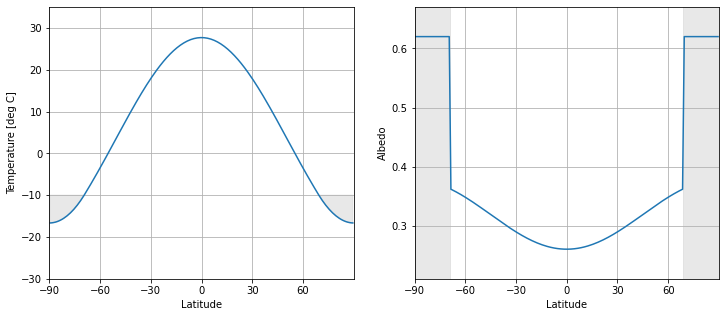

In [14]:
f = clsn.state_plot(model1)

Grey shading on the above plots indicates where there is ice in the model.  We can find the same information by querying the model `icelat` attribute:

In [7]:
model1.icelat

array([-70.,  70.])

### Sudden cooling

What happens if we force the model to be colder? Let's store our current model state, then decrease the temperature by 20 $^{\circ}C$ everywhere. 

In [ ]:
## Assign current model diagnostics to separate variables
Tequil = np.array(model1.Ts)
ALBequil = np.array(model1.albedo)
OLRequil = np.array(model1.OLR)
ASRequil = np.array(model1.ASR)

In [17]:
model1.Ts -= 20.
model1.compute_diagnostics()

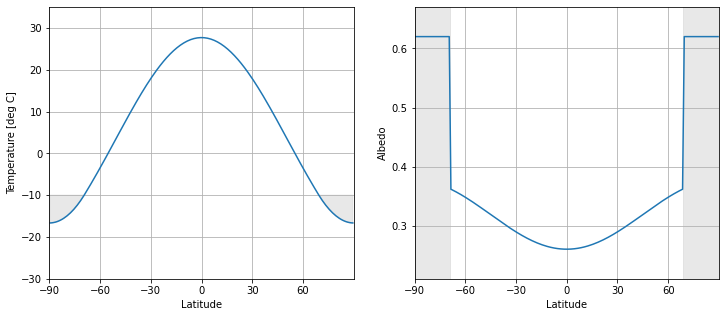

In [18]:
f2 = clsn.state_plot(model1)

*2.1. Compare and contrast the global patterns of temperature and albedo in this new, colder climate versus the previous simulation.*

*2.2. Repeat the comparison with a warmer climate.  What is responsible for the differences?*

Let's look at the radiative effect - how does the absorbed shortwave radiation change with this colder climate?

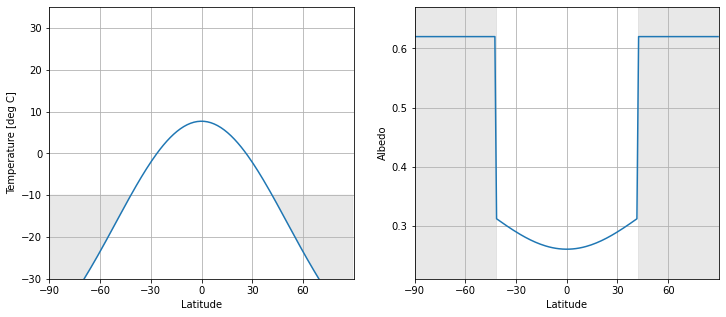

In [19]:
m2 = climlab.process_like(model1)
m2.Ts -= 20.
m2.compute_diagnostics()
f3 = clsn.state_plot(m2)

Text(0, 0.5, 'ASR (W m$^{-2}$)')

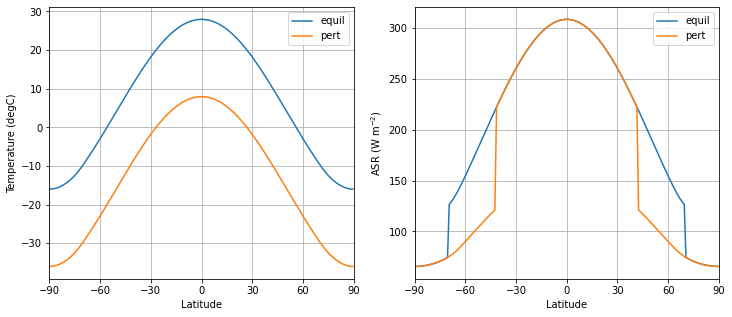

In [10]:
my_ticks = [-90,-60,-30,0,30,60,90]
lat = model1.lat

fig = plt.figure( figsize=(12,5) )

ax1 = fig.add_subplot(1,2,1)
ax1.plot(lat, Tequil, label='equil') 
ax1.plot(lat, model1.state['Ts'], label='pert' )
ax1.grid()
ax1.legend()
ax1.set_xlim(-90,90)
ax1.set_xticks(my_ticks)
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Temperature (degC)')

ax2 = fig.add_subplot(1,2,2)
ax2.plot( lat, ASRequil, label='equil') 
ax2.plot( lat, model1.diagnostics['ASR'], label='pert' )
ax2.grid()
ax2.legend()
ax2.set_xlim(-90,90)
ax2.set_xticks(my_ticks)
ax2.set_xlabel('Latitude')
ax2.set_ylabel('ASR (W m$^{-2}$)')

This tells us that making the climate colder, and allowing the ice edge to advance, tends to decrease the absorbed shortwave radiation (ASR).  That is, ice advance due to cooling is a ***positive feedback*** that will tend to lead to more cooling and more ice advance. 

____________
<a id='section3'></a>

## 3. Snowball Earth onset
____________


In section 2 we forced the model to be cooler everywhere.  Now, we'll examine some real conditions of the past that could have forced a cooling.

In [ ]:
## code for decreasing stellar constant S0

## plot an example covered in ice

____________
<a id='section4'></a>

## 4. Escape from the Snowball
____________


![Earth from space today, NASA](./figs/nasa-earth_from_space.jpg)

With ice covering nearly the entire surface of the Earth, the planetary albedo would be very high.  So, how come we do not still live on Snowball Earth today?

*4.1. Plot the temperature, albedo, and ice edge latitude for a range of solar constants $S_0$.  Use information from Hoffman & Li to indicate present-day and Marinoan/Sturtian conditions on the plot.*

*4.2. Find a value of the solar constant $S_0$ for which there is no ice cover.  Show model input and output that support your inference that there is no ice cover for this value.*

*4.3. Suppose we were in a Snowball Earth event with present-day solar constant.  By how much would the solar constant have to increase to break out of this Snowball Earth?  How does that increase compare with the known variability of the solar constant?*

*4.4. Based on our class discussions and your reading, describe two Earth system processes (other than solar variability) that could spur a transition from Snowball Earth to current conditions.*

*4.5. A second hypothesis to explain geologic evidence for low-paleolatitude glaciation is called "Slushball Earth", in which thick ice cover was mostly confined to land, with slushy or partially open oceans.  How would you expand on the simulations in this lab to test the plausibility of the Slushball Earth hypothesis?*

____________

## Credits

This notebook was developed by [Lizz Ultee](http://ehultee.github.io), based in large part on the `ClimateModeling_courseware` resources of author of [Brian E. J. Rose](http://www.atmos.albany.edu/facstaff/brose/index.html).
____________